In [1]:
from strategiesavg import *
from data import *
import matplotlib.pyplot as plt

In [2]:
# Raw
d0 = get_hf_data()
# Outliers
d1 = get_hf_data(filter_outliers=True)
# Scaling
d2 = get_hf_data(scaling='z-score')
d3 = get_hf_data(scaling='minmax')
# Outliers and scaling
d4 = get_hf_data(filter_outliers=True, scaling='z-score')
d5 = get_hf_data(filter_outliers=True, scaling='minmax')

dfs = [d0,d1]
balancings = [None, 'undersample', 'oversample', 'smote']

  3%|▎         | 4/150 [00:00<00:03, 38.40it/s]

Index:  0 balancing: None


100%|██████████| 150/150 [00:23<00:00,  6.40it/s]


max_depth, learning_rate, n_estimators
Accuracy: 0.67
Params: (5, 0.1, 10)


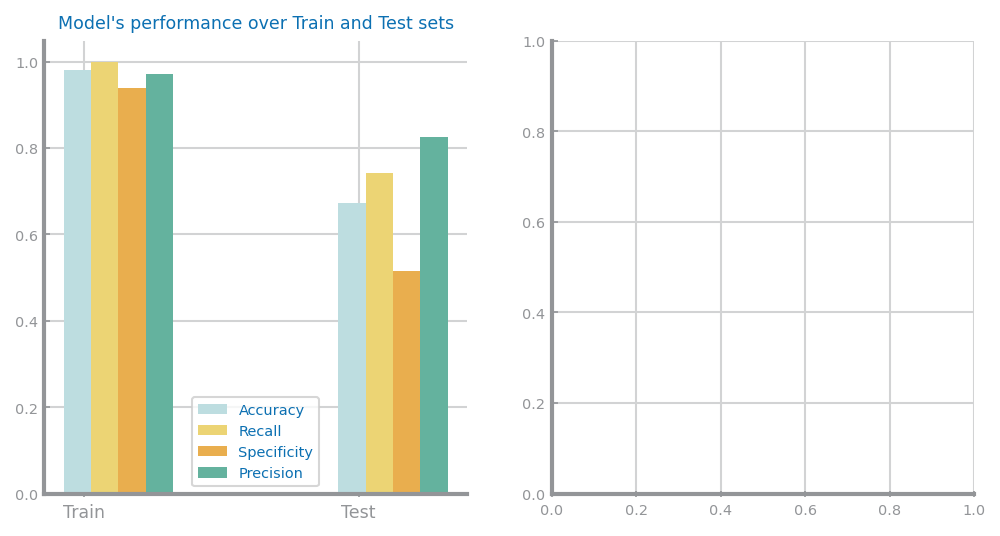

  3%|▎         | 4/150 [00:00<00:05, 25.30it/s]

Results: {'Accuracy': [0.9799232914923292, 0.6721468926553672], 'Recall': [0.9987654320987654, 0.7418292682926829], 'Specificity': [0.9400546821599453, 0.5157894736842106], 'Precision': [0.9725599509933469, 0.8262827611664821]}

------


Index:  0 balancing: undersample


100%|██████████| 150/150 [00:18<00:00,  8.03it/s]


max_depth, learning_rate, n_estimators
Accuracy: 0.68
Params: (5, 0.7, 250)


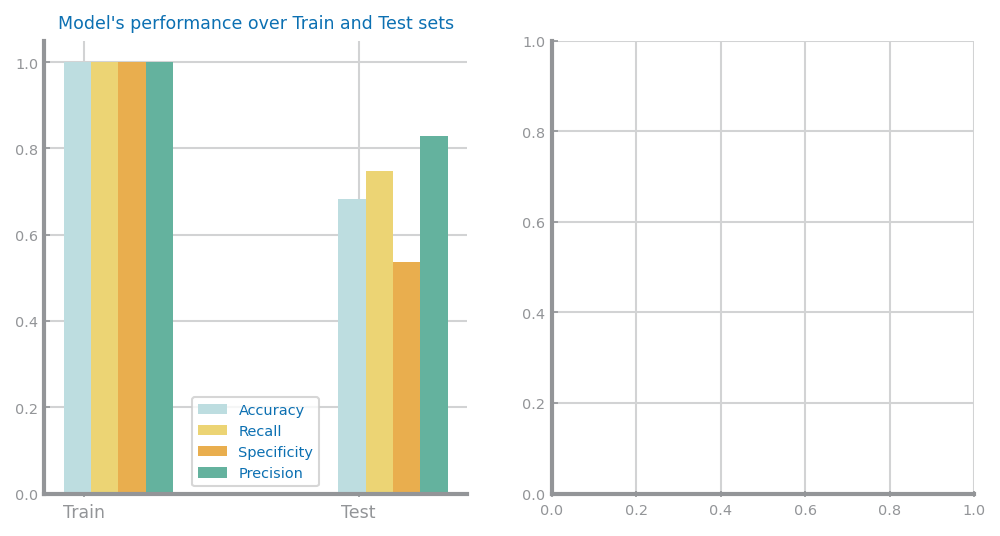

  3%|▎         | 4/150 [00:00<00:04, 31.99it/s]

Results: {'Accuracy': [1.0, 0.682316384180791], 'Recall': [1.0, 0.7470731707317073], 'Specificity': [1.0, 0.5368421052631579], 'Precision': [1.0, 0.8298966364483606]}

------


Index:  0 balancing: oversample


100%|██████████| 150/150 [00:27<00:00,  5.36it/s]


max_depth, learning_rate, n_estimators
Accuracy: 0.65
Params: (10, 0.9, 150)


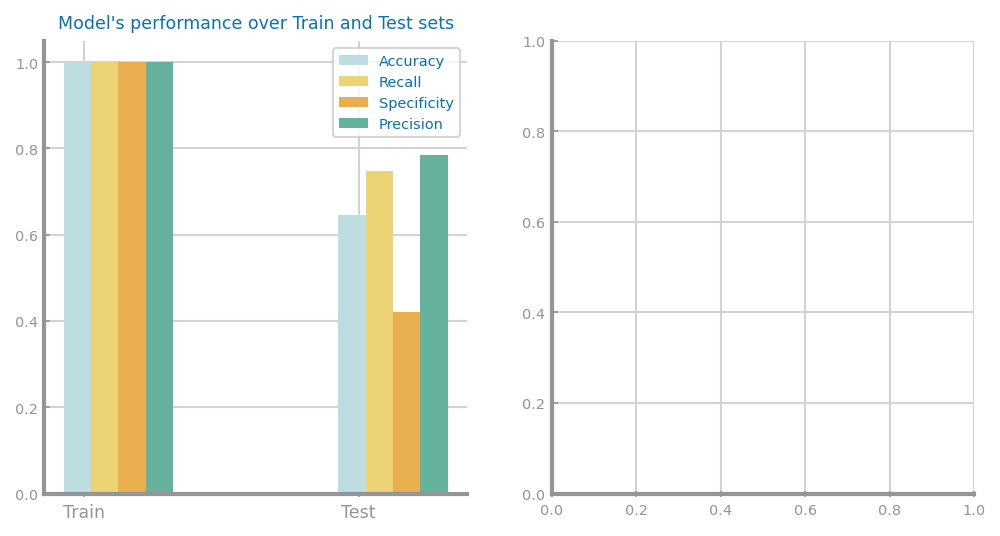

  3%|▎         | 4/150 [00:00<00:04, 29.60it/s]

Results: {'Accuracy': [1.0, 0.645593220338983], 'Recall': [1.0, 0.7474390243902439], 'Specificity': [1.0, 0.42105263157894735], 'Precision': [1.0, 0.784482109227872]}

------


Index:  0 balancing: smote


100%|██████████| 150/150 [00:30<00:00,  4.93it/s]


max_depth, learning_rate, n_estimators
Accuracy: 0.69
Params: (5, 0.7, 250)


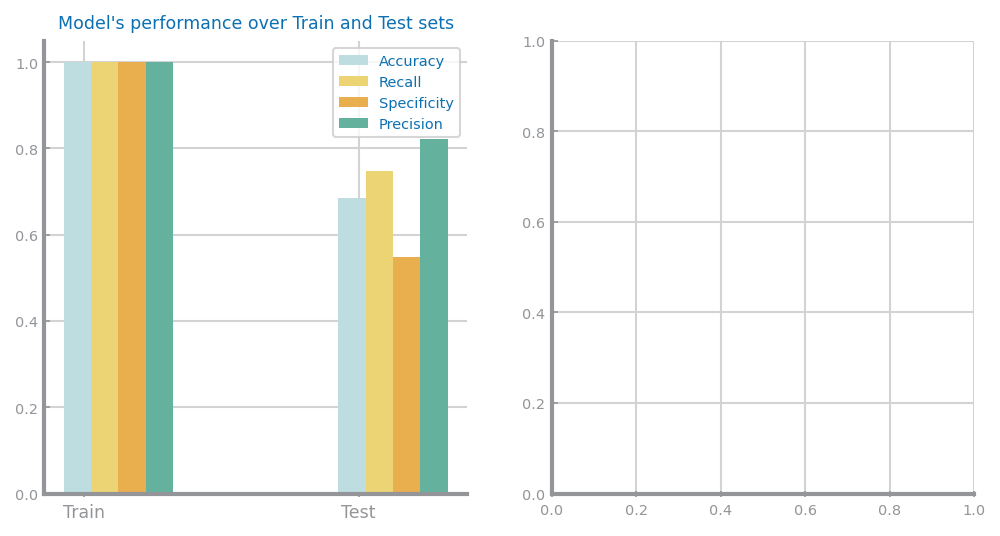

  3%|▎         | 4/150 [00:00<00:04, 32.33it/s]

Results: {'Accuracy': [1.0, 0.6855932203389831], 'Recall': [1.0, 0.7480487804878049], 'Specificity': [1.0, 0.5473684210526316], 'Precision': [1.0, 0.8228481222997673]}

------


Index:  1 balancing: None


100%|██████████| 150/150 [00:24<00:00,  6.15it/s]


max_depth, learning_rate, n_estimators
Accuracy: 0.69
Params: (5, 0.9, 200)


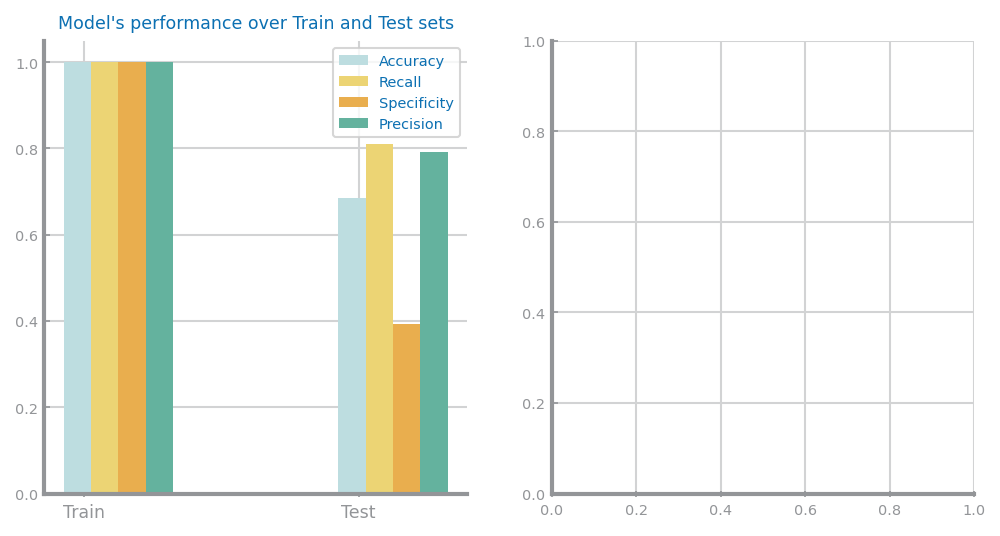

  3%|▎         | 4/150 [00:00<00:03, 38.87it/s]

Results: {'Accuracy': [1.0, 0.6855263157894737], 'Recall': [1.0, 0.8108974358974359], 'Specificity': [1.0, 0.3941176470588235], 'Precision': [1.0, 0.7926034462344247]}

------


Index:  1 balancing: undersample


100%|██████████| 150/150 [00:17<00:00,  8.67it/s]


max_depth, learning_rate, n_estimators
Accuracy: 0.72
Params: (5, 0.7, 250)


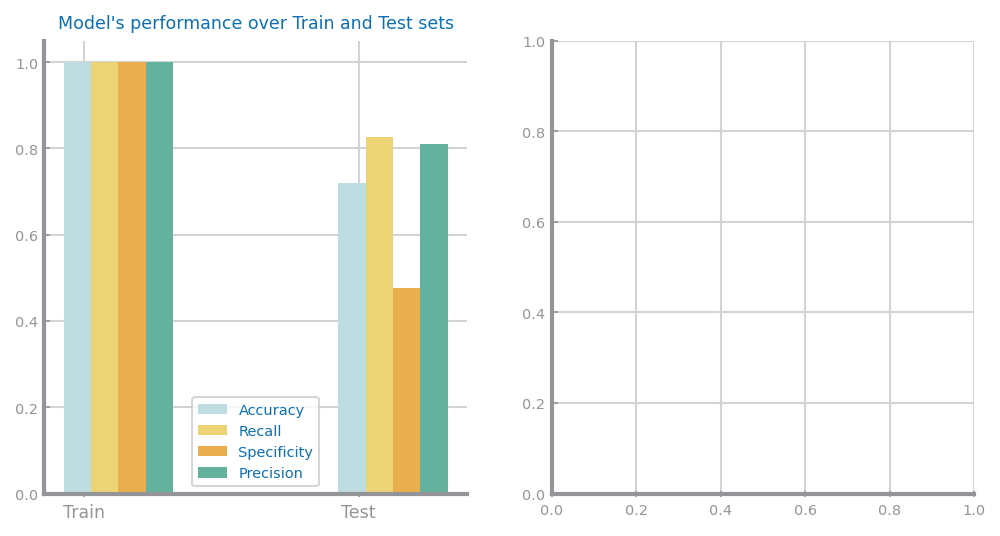

  3%|▎         | 4/150 [00:00<00:03, 36.84it/s]

Results: {'Accuracy': [1.0, 0.7207393483709273], 'Recall': [1.0, 0.8265384615384616], 'Specificity': [1.0, 0.47647058823529415], 'Precision': [1.0, 0.8111465120245608]}

------


Index:  1 balancing: oversample


100%|██████████| 150/150 [00:24<00:00,  6.01it/s]


max_depth, learning_rate, n_estimators
Accuracy: 0.71
Params: (5, 0.9, 300)


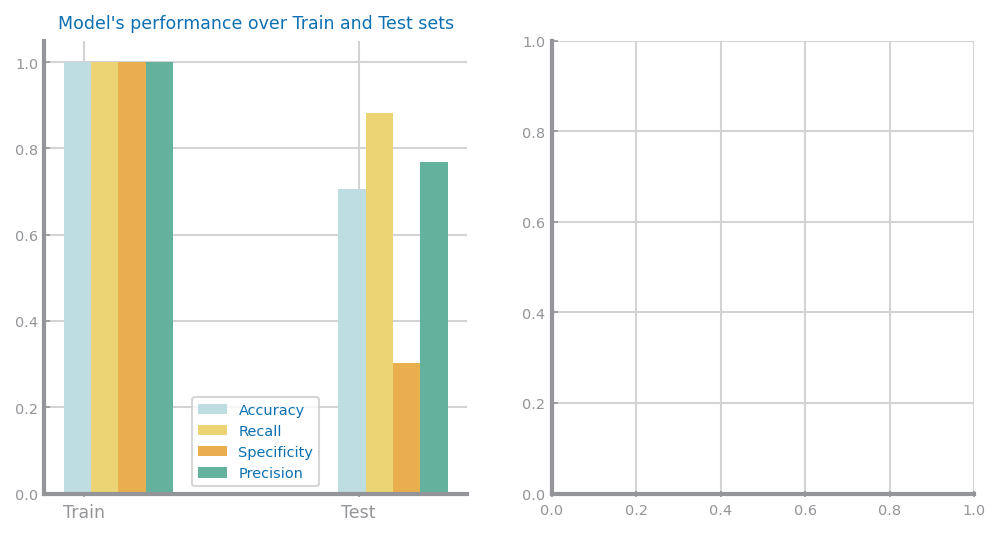

  3%|▎         | 4/150 [00:00<00:04, 34.66it/s]

Results: {'Accuracy': [1.0, 0.706516290726817], 'Recall': [1.0, 0.8824358974358975], 'Specificity': [1.0, 0.3026143790849673], 'Precision': [1.0, 0.7690036023865812]}

------


Index:  1 balancing: smote


100%|██████████| 150/150 [00:30<00:00,  4.89it/s]


max_depth, learning_rate, n_estimators
Accuracy: 0.65
Params: (5, 0.9, 200)


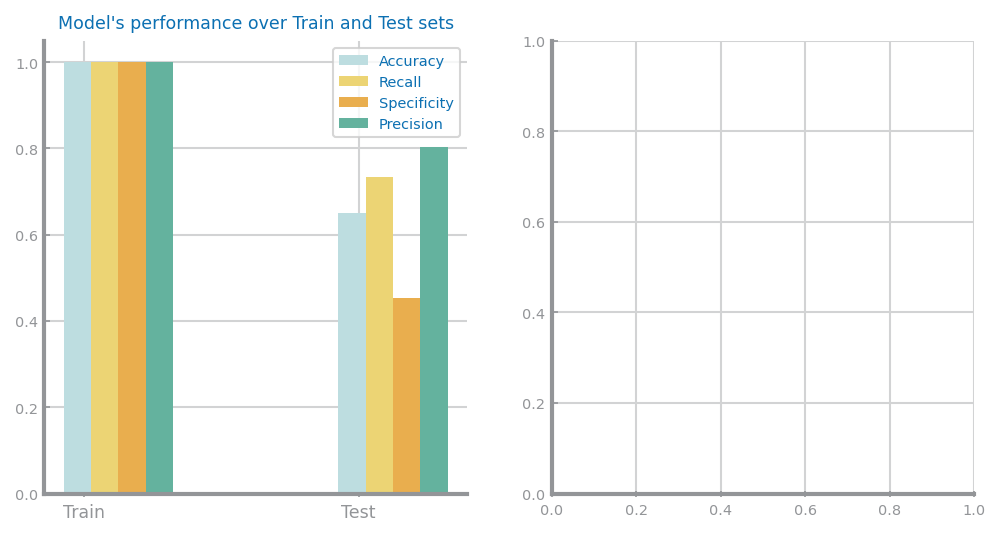

Results: {'Accuracy': [1.0, 0.6505639097744361], 'Recall': [1.0, 0.7341025641025641], 'Specificity': [1.0, 0.45359477124183006], 'Precision': [1.0, 0.8032976605276256]}

------


('1,undersample', 0.7207393483709273)


In [3]:
best = ("", 0)

for i, df in enumerate(dfs):
    for bal in balancings:
        print("Index: ", i, "balancing:", bal)
        params, results = XGBoostKFold(df, "DEATH_EVENT", balancing=bal)
        accuracy = results["Accuracy"][1]
        print(f'Accuracy: {accuracy:.2f}')
        print(f'Params: {params}')
        plt.pause(0.1)
        print("Results:", results)
        print("\n------\n\n")
        if (accuracy > best[1]):
            if bal == None: bal = "None"
            best = (str(i) + "," + bal, accuracy)
            
print(best)